In [1]:
import pandas as pd
#pd.set_option('display.max_rows', None)
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import numpy as np
import netCDF4 as nc
np.set_printoptions(threshold=100000)
from shapely.geometry import Polygon, Point, MultiPoint
from shapely.ops import cascaded_union
from datetime import datetime, timedelta
import time
import warnings
import statsmodels.api as sm
import datetime

warnings.filterwarnings('ignore')

from my_functions import sat_vap_press, vap_press, hot_dry_windy, haines

In [25]:
dat = nc.Dataset('../2020/Apr2020_to_Oct2020/Hourly_Emissions_FV3_13km_202008180000_202008182300.nc')
print(dat.variables.keys())
print(dat.dimensions.keys())

dict_keys(['Latitude', 'Longitude', 'time', 'area', 'Mean_FRP', 'FRE', 'CO2', 'CO', 'SO2', 'OC', 'BC', 'PM2.5', 'NOx', 'NH3'])
dict_keys(['Longitude', 'Latitude', 'xFRP', 'yFRP', 'Time'])


In [7]:
lon_corner = dat['Longitude'][:]
lat_corner = dat['Latitude'][:]
print(lat_corner)

#print(lon_corner-360)
lat_center, lon_center = calculate_grid_cell_corners(lat_corner, lon_corner)
print(lat_center.shape)
print(lat_corner.shape) #these are the CORNERS OF THE CELL
oc = np.sum(dat['OC'][:], axis=2) #sum up OC emissions over the day, OC has units of kilograms
print(oc.shape)

print(dat['area'])

[[22.13663101196289 22.164623260498047 22.19247817993164
  22.220197677612305 22.247779846191406 22.275224685668945
  22.302532196044922 22.32970428466797 22.35673713684082
  22.383634567260742 22.4103946685791 22.437015533447266 22.4635009765625
  22.489849090576172 22.51605987548828 22.542131423950195
  22.568065643310547 22.59386444091797 22.619522094726562
  22.645044326782227 22.670429229736328 22.695674896240234
  22.720781326293945 22.745752334594727 22.770584106445312
  22.795276641845703 22.81983184814453 22.844249725341797
  22.868528366088867 22.892669677734375 22.916669845581055
  22.940534591674805 22.964258193969727 22.987844467163086
  23.01129150390625 23.03459930419922 23.057769775390625
  23.080801010131836 23.10369300842285 23.126445770263672
  23.149059295654297 23.171533584594727 23.19386863708496 23.216064453125
  23.238121032714844 23.260038375854492 23.281816482543945
  23.30345344543457 23.324953079223633 23.346311569213867
  23.346311569213867 23.3249530792236

NameError: name 'calculate_grid_cell_corners' is not defined

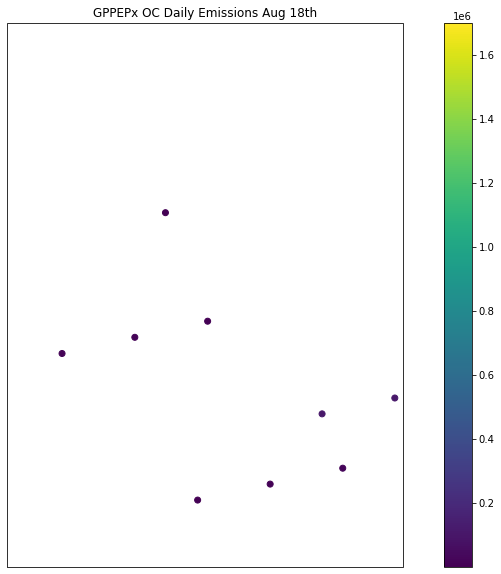

In [6]:
fig = plt.figure(figsize=(15,10))
ax= fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines()
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-123.4, -122.6, 39.4, 40.5])
ax.coastlines()
ax.add_feature(cfeature.STATES, linestyle='-', alpha=.5)
plt.scatter(lon_center,lat_center, c=oc)
plt.title('GPPEPx OC Daily Emissions Aug 18th')
plt.colorbar()
plt.show()

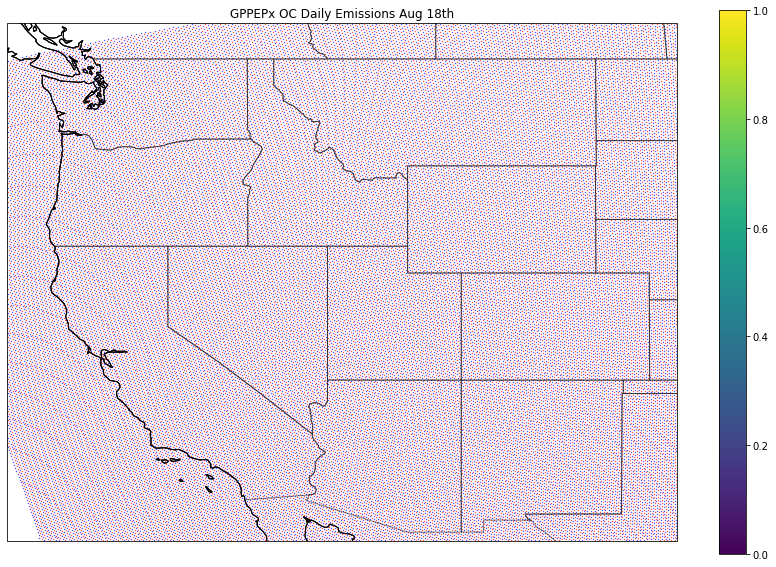

In [7]:
fig = plt.figure(figsize=(15,10))
ax= fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines()
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-126, -101, 31, 50])
ax.coastlines()
ax.add_feature(cfeature.STATES, linestyle='-', alpha=.5)
plt.scatter(lon_center,lat_center, c='r', s=0.1)
plt.scatter(lon_corner,lat_corner, c='b', s=0.1)

plt.title('GPPEPx OC Daily Emissions Aug 18th')
plt.colorbar()
plt.show()

In [12]:
def calculate_grid_cell_corners(LAT, LON):
    #we will assume the very edges of the polygons don't touch the boundary of the domain
    lat_corners = (LAT[0:(LAT.shape[0]-1),  0:(LAT.shape[1])-1] + LAT[1:(LAT.shape[0]), 1:(LAT.shape[1])])/2
    lon_corners = (LON[0:(LAT.shape[0]-1),  0:(LAT.shape[1])-1] + LON[1:(LAT.shape[0]), 1:(LAT.shape[1])])/2
    return lat_corners, lon_corners

In [8]:
print((lat_center[0:(lat_center.shape[0]-1),  0:(lat_center.shape[1])-1] -lat_center[1:(lat_center.shape[0]), 1:(lat_center.shape[1])]))

NameError: name 'LAT' is not defined

## Check the shape of the data

In [40]:
lat_corner = dat['Latitude'][:]
lon_corner = dat['Longitude'][:]
lat_center, lon_center = calculate_grid_cell_corners(lat_corner, lon_corner)

pm25=dat['PM2.5'][:]

print(lat_corner.shape, pm25.shape)
print(lat_corner[0,0], lon_corner[0,0]-360)
print(lat_corner[1,0], lon_corner[1,0]-360)

(233, 397) (232, 396, 24)
22.136631 -122.35806274414062
22.248625 -122.3834228515625


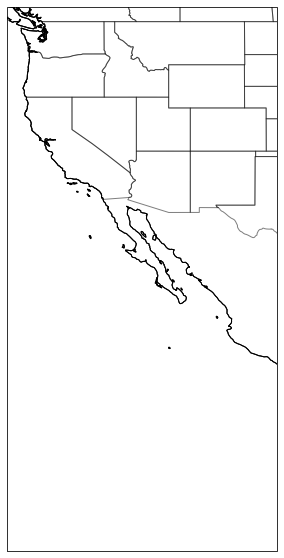

In [41]:
fig = plt.figure(figsize=(15,10))
ax= fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines()
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-126, -101, 0, 50])
ax.coastlines()
ax.add_feature(cfeature.STATES, linestyle='-', alpha=.5)
plt.scatter(lat_corner[0,0], lon_corner[0,0], c='r', s=10)
plt.scatter(lat_corner[1,0], lon_corner[1,0], c='b', s=10)
plt.show()